# 1、数据清洗

In [1]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['font.family'] = 'SimHei' #替换字体为中文，避免中文乱码


In [2]:
# index_col = 0 将第一列设置为索引
behavior = pd.read_csv("数据集\\user_data.csv",index_col = 0)
behavior.head()

,user_id,sku_id,action_time,module_id,type
17,1455298,208441,2018-04-11 15:21:43,6190659,1
18,1455298,334318,2018-04-11 15:14:54,6190659,1
19,1455298,237755,2018-04-11 15:14:13,6190659,1
20,1455298,6422,2018-04-11 15:22:25,6190659,1
21,1455298,268566,2018-04-11 15:14:26,6190659,1


In [3]:
behavior[:10]

,user_id,sku_id,action_time,module_id,type
17,1455298,208441,2018-04-11 15:21:43,6190659,1
18,1455298,334318,2018-04-11 15:14:54,6190659,1
19,1455298,237755,2018-04-11 15:14:13,6190659,1
20,1455298,6422,2018-04-11 15:22:25,6190659,1
21,1455298,268566,2018-04-11 15:14:26,6190659,1
22,1455298,115915,2018-04-11 15:13:35,6190659,1
23,1455298,208254,2018-04-11 15:22:16,6190659,1
24,1455298,177209,2018-04-14 14:09:59,6628254,1
25,1455298,71793,2018-04-14 14:10:29,6628254,1
26,1455298,141950,2018-04-12 15:37:53,10207258,1


In [4]:
#查看数据信息
behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7540394 entries, 17 to 37214234
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   sku_id       int64 
 2   action_time  object
 3   module_id    int64 
 4   type         int64 
dtypes: int64(4), object(1)
memory usage: 345.2+ MB


In [5]:
# 计算并显示behavior数据框中每列的缺失值数量
behavior.isnull().sum()

user_id        0
sku_id         0
action_time    0
module_id      0
type           0
dtype: int64

In [6]:
behavior['action_time'] = pd.to_datetime(behavior['action_time'],format = 'mixed',errors = 'coerce')
# to_datetime:用于将字符串转换为日期事件对象
# mixed:指定日期的时间格式，这里指的是混合格式
# errors = 'coerce' 如果转换失败,将无效解析置为NAT(缺失值)

# 将action_time列的日期部分提取出来
behavior['date'] = behavior['action_time'].dt.date # 日期
behavior['hour'] = behavior['action_time'].dt.hour # 时间
behavior['weekday'] = behavior['action_time'].dt.day_name() #周几


# date 日期部分 (年-月-日)
# hour 小时部分 (0-23)
# weekday 星期几


behavior.head(10)


,user_id,sku_id,action_time,module_id,type,date,hour,weekday
17,1455298,208441,2018-04-11 15:21:43,6190659,1,2018-04-11,15,Wednesday
18,1455298,334318,2018-04-11 15:14:54,6190659,1,2018-04-11,15,Wednesday
19,1455298,237755,2018-04-11 15:14:13,6190659,1,2018-04-11,15,Wednesday
20,1455298,6422,2018-04-11 15:22:25,6190659,1,2018-04-11,15,Wednesday
21,1455298,268566,2018-04-11 15:14:26,6190659,1,2018-04-11,15,Wednesday
22,1455298,115915,2018-04-11 15:13:35,6190659,1,2018-04-11,15,Wednesday
23,1455298,208254,2018-04-11 15:22:16,6190659,1,2018-04-11,15,Wednesday
24,1455298,177209,2018-04-14 14:09:59,6628254,1,2018-04-14,14,Saturday
25,1455298,71793,2018-04-14 14:10:29,6628254,1,2018-04-14,14,Saturday
26,1455298,141950,2018-04-12 15:37:53,10207258,1,2018-04-12,15,Thursday


In [7]:
# 删除behavior数据框中雨数据分析无关的列 module_id
behavior = behavior.drop("module_id",axis = 1)
# axis指定操作轴,axis = 0按行删除,axis = 1 按列删除
# 行为类型: 1.浏览；2、下单；3、关注；4、评论；5、加购物车

In [8]:
behavior_type = {1:'pv',2:'pay',3:'fav',4:'comm',5:'cart'}
# 将df中的type类型映射为单词
# apply函数lambda函数将每个数字类型的行为标签转换为相对应的字符类型
behavior['type'] = behavior['type'].apply(lambda x: behavior_type[x])
# 重置DataFrame 的索引,丢弃原来的索引
behavior.reset_index(drop = True,inplace = True)
# drop = True 表示丢弃原来的索引,不将其作为新的列添加到DF中
# inplace = True 表示直接在原DF上修改,而不返回一个新的DF

In [9]:
behavior.head()

,user_id,sku_id,action_time,type,date,hour,weekday
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


# 2、分析模型构建指标

## 2.1 流量指标分析

pv(总访问量)、uv(总访客数)、消费用户数占比、消费用户总访问量占比、消费用户人均访问量、跳失率

### 2.1.1pv(总访问量)、uv(总访客数)、消费用户数占比、消费用户总访问量占比、消费用户人均访问量

In [10]:
# 总访问量
pv = behavior[behavior['type'] == 'pv']['user_id'].count()
# 总访客数
uv = behavior['user_id'].nunique()
# nunique 计算唯一值（不重复）的数量
# 消费用户数
user_pay = behavior[behavior['type'] == 'pay']['user_id'].unique()
# unique 用于获取series和Dataframe 列中的唯一值（不重复值）

# 日均访问量
pv_per_day = pv / behavior['date'].nunique()

# 人均访问量

#总访问量除以总访客数得到人均访问量
pv_per_user = pv / uv

# 消费用户访问量

#筛选出所有消费用户的行为数据,计算消费用户行为类型为pv的数量
pv_pay = behavior[behavior['user_id'].isin(user_pay)]['type'].value_counts().pv
# behavior[behavior['user_id'].isin(user_pay)]  筛选出所有消费用户的行为数据
# ['type'].value_counts().pv 计算消费用户中行为类型为pv的数量，若不存在则返回0


# 消费用户数占比
# 0.543067579932479
user_pay_rate = len(user_pay) / uv


# 消费用户总访问量占比
# 0.6289755452445804
pv_pay_rate = pv_pay /pv

# 消费用户人均访问量
# 9.897088467542703
pv_per_buy_user = pv_pay / len(user_pay)



In [11]:
# 输出所有内容
print('总访问量为:%i' %pv)
print('总访客数为：%i' %uv)
print('消费用户数为：%i' %len(user_pay))
print('日均访问量为：%.3f' %pv_per_day)
print('人均访问量为：%.3f' % pv_per_user)
print('消费用户访问量为：%i' %pv_pay)
print('消费用户数占比为：%.3f%%' %(user_pay_rate * 100))
print('消费用户总访问量占比为：%.3f%%'%(pv_pay_rate * 100))
print('消费用户人均访问量为：%.3f' %pv_per_buy_user)

总访问量为:6229177
总访客数为：728959
消费用户数为：395874
日均访问量为：389323.562
人均访问量为：8.545
消费用户访问量为：3918000
消费用户数占比为：54.307%
消费用户总访问量占比为：62.898%
消费用户人均访问量为：9.897


结论：消费用户人均访问量和总访问量占比都在均值以上，有过消费记录的用户更愿意在网站上花费更多时间，说明网站的购物体验 尚可，
老用户对网站有一定的依赖性，对没有过消费记录的用户让快速了解平台（网站）的使用方法和价值，加强用户和平台之间的粘性。

### 2.1.2 跳失率

In [12]:
# 跳失率:只进行了一次操作就离开的用户数/总用户数
# groupby('uer_id') 按照user_id进行分组,得到一个分组对象
# ['type'].count() 对每个分组计算type列的计数,即每个用户的行为操作次数
# ==1 返回一个布尔数组, 指每一个用户的行为操作菜蔬是否等于1

attrition_rates = sum(behavior.groupby('user_id')['type'].count() == 1) / (behavior['user_id'].nunique())
attrition_rates


0.2258508366039791

In [13]:
print('跳失率为:%.3f%%'%(attrition_rates * 100))

跳失率为:22.585%


结论：在整个计算周期内（15天）跳失率为22.585%，还是有较多的用户仅做一次操作，需要加强平台首页的吸引力（活动等）


## 2.2 用户消费频次分析

In [14]:
# 单个用户消费总次数
# 从behavior数据框中筛选行为类型为'pay'
# 按照user_id 进行分组,计算每个用户的消费次数
total_buy_count = behavior[behavior['type'] == 'pay'].groupby('user_id')['type'].count().to_frame().rename(columns = {'type':'total'})

# 消费次数前十的客户
topbuy10 = total_buy_count.sort_values(by = 'total',ascending = False)[:10]


# 复购率
# 消费次数大于等于2叫复购

re_buy_rate = total_buy_count[total_buy_count >= 2].count() / total_buy_count.count()


In [15]:
# 将消费次数前十的客户的索引值重置,重置为整数索引,并对total列样式设置
topbuy10.reset_index().style.bar(color = 'LightPink', subset = ['total'])
# style 获取DF的样式对象
# bar 应用条形图样式
# color 设置填充颜色
# subset 仅对某一列进行设置

,user_id,total
0,1187177,133
1,502169,68
2,600837,53
3,453216,51
4,1372747,36
5,112205,35
6,1243056,34
7,420489,30
8,1470958,30
9,82771,29


Text(0.5, 1.0, '用户消费总次数')

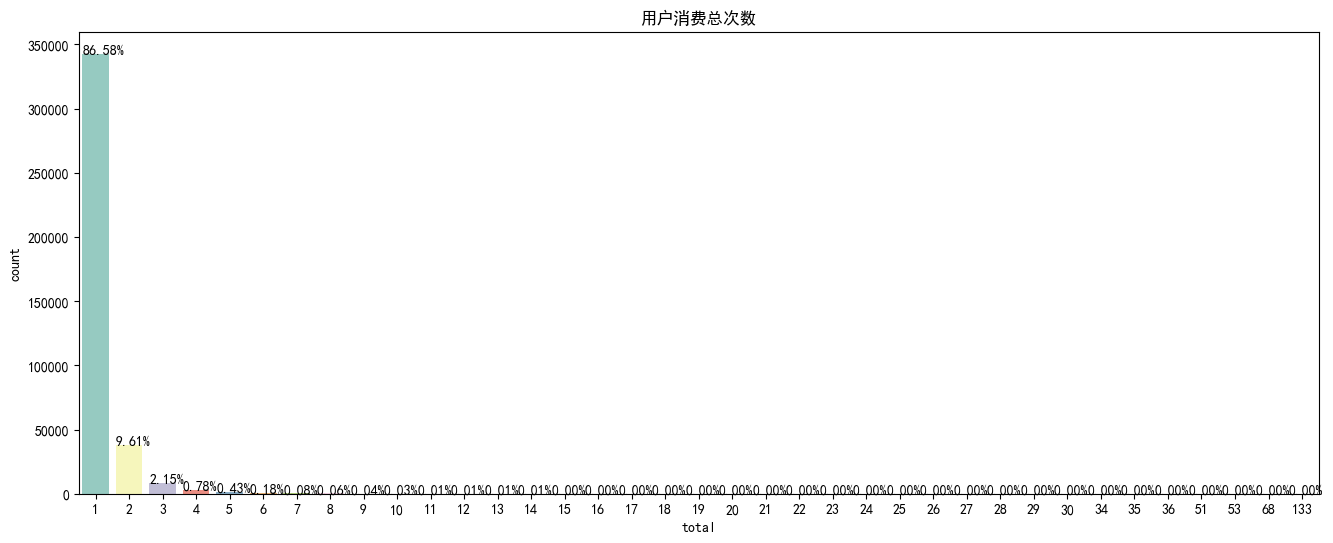

In [16]:
# 单个用户消费总次数可视化
# 重置索引

tbc_box = total_buy_count.reset_index()

# 创建一个画布
# plt.subplot 用于创建子图
fig, ax = plt.subplots(figsize =[16,6])
# 使用sns.countplot() 画柱状图
sns.countplot(

    x = tbc_box['total'],
    data = tbc_box,
    #调色板
    palette = 'Set3',
    hue = tbc_box['total'],
    legend = False
)

# 遍历图标中的每个条形对象,并添加注释,显示每个消费总次数的百分比
# ax.patches 画布中每个条形
for p in ax.patches:
        # annotate 在条形上方添加注释
    ax.annotate(
        # 计算百分比格式化小数后保留2位
        '{:.2f}%'.format(100* p.get_height() / len(tbc_box['total']) ),
        # 设置注释的位置
        (p.get_x(),p.get_height())
    )
# 设置标题
plt.title('用户消费总次数')





In [17]:
print('复购率为 %.3f%%' %(re_buy_rate.iloc[0] * 100))

复购率为 13.419%


复购率较低，应加强⽼⽤户召回机制，提升购物体验，也可能因数据量较
少，统计周期之内的数据 ⽆法解释完整的购物周期，从⽽得出结论有误。

### 4.3 用户行为在时间维度的分布

日消费次数、日活跃人数、日消费人数、日消费人数占比、消费用户日均消费次数

C:\Users\15784\AppData\Local\Temp\ipykernel_15816\2426477627.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(loc = 'upper center',ncol = 2)


Text(0.5, 1.0, '日消费人数占比')

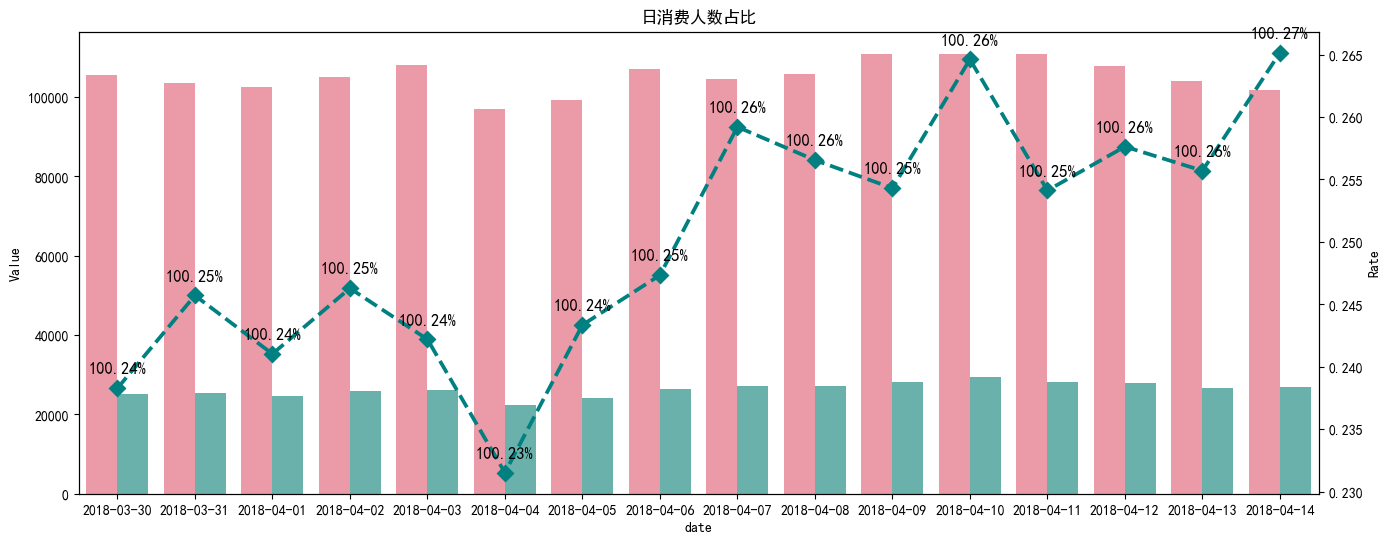

In [18]:
# 日活跃人数(有一次操作视为活跃)
daily_active_user = behavior.groupby('date')['user_id'].nunique()

# 日消费人数
daily_buy_user = behavior[behavior ['type'] == 'pay'].groupby('date')['user_id'].nunique()

#日消费人数占比
proportion_of_buyer  = daily_buy_user / daily_active_user

#日消费总次数
daily_buy_count = behavior[behavior['type'] == 'pay'].groupby('date')['type'].count()

#消费用户日人均消费次数
consumption_per_buyer = daily_buy_count / daily_buy_user

# 日消费人数占比可视化
# 柱状图数据
pob_bar = (pd.merge(daily_active_user,daily_buy_user,on = 'date')
           .reset_index()
           .rename(columns = {'user_id_x':'日活跃热人数','user_id_y':'日消费人数'})
           .set_index('date')
           .stack()
           .reset_index()
           .rename(columns = {'level_1':'Variable',0:'Value'}))

#线图数据
pob_line = proportion_of_buyer.reset_index().rename(columns = {'user_id':'Rate'})

# 创建图表并设置大小
fig1 = plt.figure(figsize = [16,6])
# 添加第一个子图(柱状图)
ax1 = fig1.add_subplot(111)
# 添加第二个子图(线图),共享x轴
ax2 = ax1.twinx()

# 绘制柱状图
sns.barplot( x ='date',
             y = 'Value',
             hue = 'Variable', 
             data = pob_bar,
             ax = ax1,
             alpha = 0.8,
             palette = 'husl')

# 设置柱状图的图例标题为空并移除图例
ax1.legend().set_title('')
ax1.legend().remove()

# 绘制线图
sns.pointplot(x = pob_line['date'], 
              y = pob_line['Rate'],
              ax = ax2,
              markers = 'D',
              linestyles = '--',
              color = 'teal')
#为线图上的每个数据点添加注释,显示比例百分比
x = list(range(0,16))
for a,b in zip(x,pob_line['Rate']):
    plt.text(a+0., 
                b+0.001,
                '%.2f%%'%(b+100),
                ha = 'center',
                va = 'bottom',
                fontsize = 12)

# 设置图例位置和标题
fig.legend(loc = 'upper center',ncol = 2)
plt.title('日消费人数占比')

In [19]:
# 日期和用户ID分组,计算每个用户在每个日期的行为次数
dau3_df = behavior.groupby(['date','user_id'])['type'].count().reset_index()

# 筛选出行为次数大于等于3的用户记录
dau3_df = dau3_df[dau3_df['type'] >= 3]

# 每日高活跃用户数(每日操作数大于3次)
dau3_num = dau3_df.groupby('date')['user_id'].nunique()


Text(0.5, 1.0, '每日高活跃用户数')

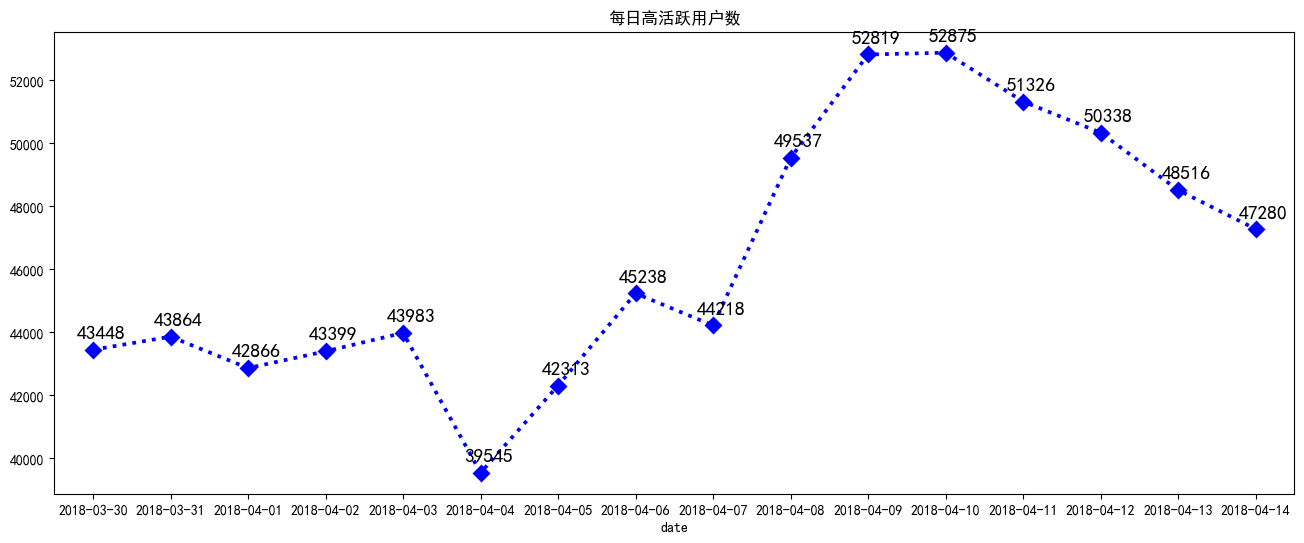

In [20]:
# 创建图表并设置大小
fig,ax = plt.subplots(figsize = [16,6])
# 使用plt.subplots 创建一个图表,并设置大小为宽度 16英寸，高度6英寸

# 绘制点线图
sns.pointplot(x = dau3_num.index,
              y = dau3_num.values,
              markers = 'D',
              linestyles = ':',
              color = 'blue')

# 为图表上的每个数据点添加注释,显示高活跃用户数
x = list(range(0,16))
for a,b in zip(x,dau3_num.values):
    plt.text(a+0.1, b+300, '%i'%b, ha = 'center', va = 'bottom',fontsize = 14 )
    # 使用plt.text 子图表上添加注释,遍历dau3_num 的值，在每个点上方添加相应的高活跃用户数,字体大小设为14
plt.title('每日高活跃用户数')
    

每⽇⾼活跃⽤户数在⼤部分4万以上，2018-04-04之前数量⽐较平稳，之
后数量⼀直攀升，8号9号达到最⾼，随后下降，推测数据波动应为营销活动产
⽣的。

Text(0.5, 1.0, '高活跃用户累计活跃天数分布')

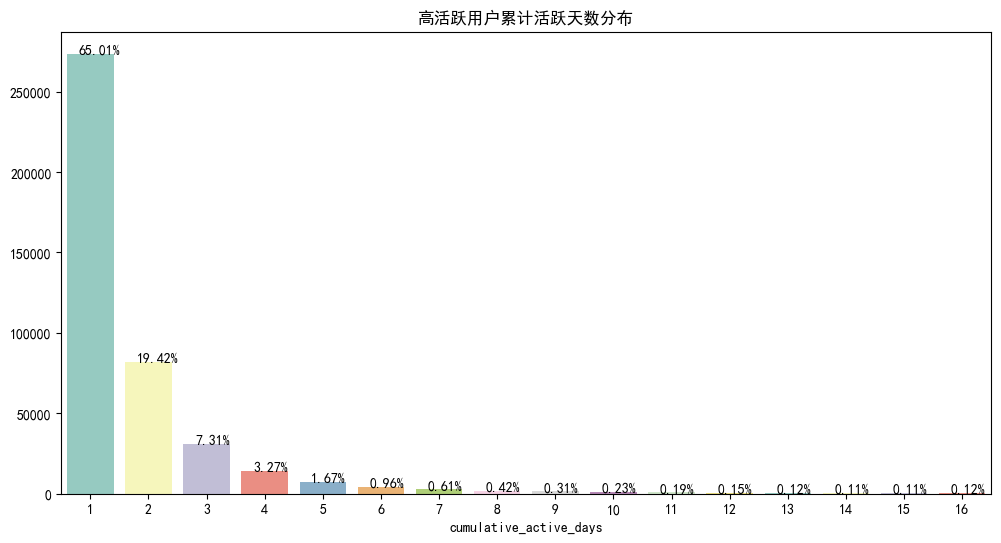

In [21]:
# 高活跃用户累计活跃天数分布
dau3_cumsum = dau3_df.groupby('user_id')['date'].count()
# 对dau3_df 数据按'user_id' 列进行分组,并计算每个用户的活跃天数(即'date'列的计数),结果表示每个高活跃用户的累计活跃天数

# 计算每个用户的累计活跃天数
dau3_df['cumulative_active_days'] = dau3_df.groupby('user_id')['date'].transform('nunique')

# 统计不同累计活跃天数的用户数量
cumulative_days_counts = dau3_df.groupby('cumulative_active_days')['user_id'].nunique()

#绘制累计活跃天数分布图
fig,ax = plt.subplots(figsize = [12,6])

sns.barplot(x = cumulative_days_counts.index,
            y = cumulative_days_counts.values,
            palette = 'Set3',
            hue = cumulative_days_counts.index,
            legend = False)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/len(dau3_cumsum.values)),(p.get_x() +0.2,p.get_height() + 100))

plt.title('高活跃用户累计活跃天数分布')


统计周期内，⼤部分⾼活跃⽤户累计活跃天数在六天以下，但也存在⾼达⼗
六天的超级活跃⽤户数量，对累计天数较⾼的⽤户要推出连续登录奖励等继续
维持其对平台的黏性，对累计天数较低的⽤户要适当进⾏推送活动消息等对其
进⾏召回

Text(0.5, 1.0, '每日浏览量')

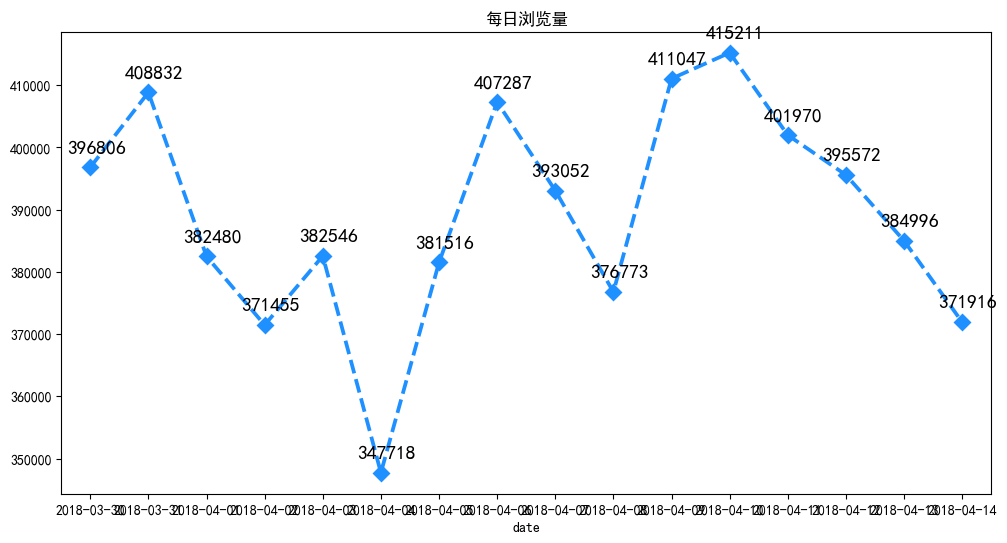

In [22]:
#每日浏览量
pv_daily = behavior[behavior['type'] == 'pv'].groupby('date')['user_id'].count()# 筛选出行为类型为 'pv'（⻚面浏览）的记录，并按日期（'date' 列）分组，计算每个日期的用户ID（'user_id'）数量，即每日浏览量
 #每日访客数
uv_daily = behavior.groupby('date')['user_id'].nunique()# 按日期（'date' 列）分组，计算每个日期的唯一用户ID（'user_id'）数量，即每日访客数

fig,ax = plt.subplots(figsize = [12,6])

sns.pointplot(x = pv_daily.index,
            y = pv_daily.values,
            markers = 'D',
            linestyles = '--',
            color = 'dodgerblue')

x=list(range(0,16))
for a,b in zip(x,pv_daily.values):   
     plt.text(a+0.1, b + 2000 , '%i' % b, ha='center', va= 'bottom',fontsize=14)    # 使用 plt.text 在图表上添加注释，遍历 pv_daily 的值，在每个点上方添加相应的每日浏览量，字体大小设为
plt.title('每日浏览量')





Text(0.5, 1.0, '每日浏览量')

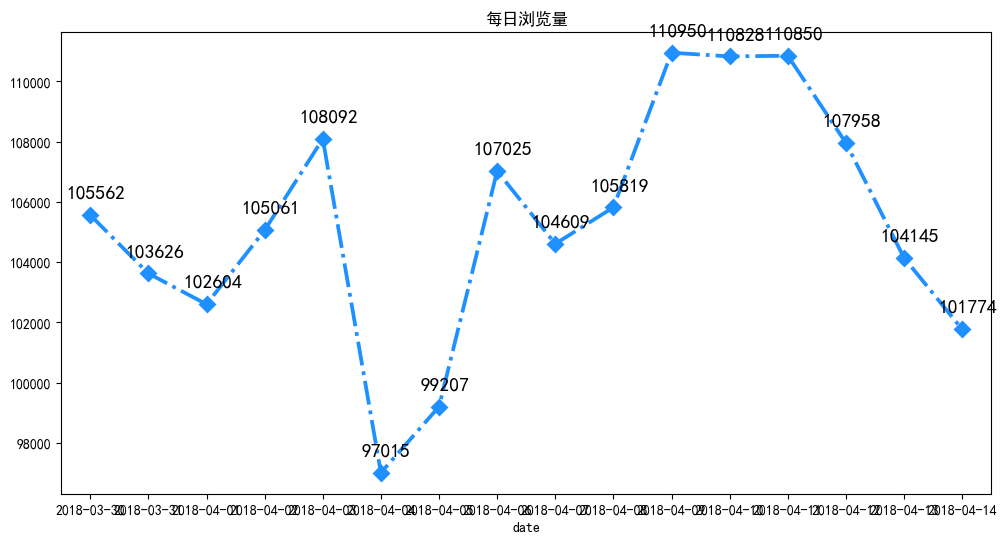

In [23]:
# 每日访客数可视化
# 创建图表并表示大小
fig,ax = plt.subplots(figsize = [12,6])

sns.pointplot(x = uv_daily.index,
            y = uv_daily.values,
            markers = 'D',
            linestyles = '-.',
            color = 'dodgerblue')

x=list(range(0,16))
for a,b in zip(x,uv_daily.values):   
     plt.text(a+0.1, b + 500 , '%i' % b, ha='center', va= 'bottom',fontsize=14)    # 使用 plt.text 在图表上添加注释，遍历 pv_daily 的值，在每个点上方添加相应的每日浏览量，字体大小设为
plt.title('每日浏览量')


浏览量和访客数每日变化趋势大致相同，2018-04-04日前后用户数量变化
波动较大，4月4日为清明节假日前一天，各数据量在当天均有明显下降，但之
后逐步回升，推测应为节假日营销活动或推广拉新活动带来的影响。

Text(0.5, 1.0, '浏览量随小时变化')

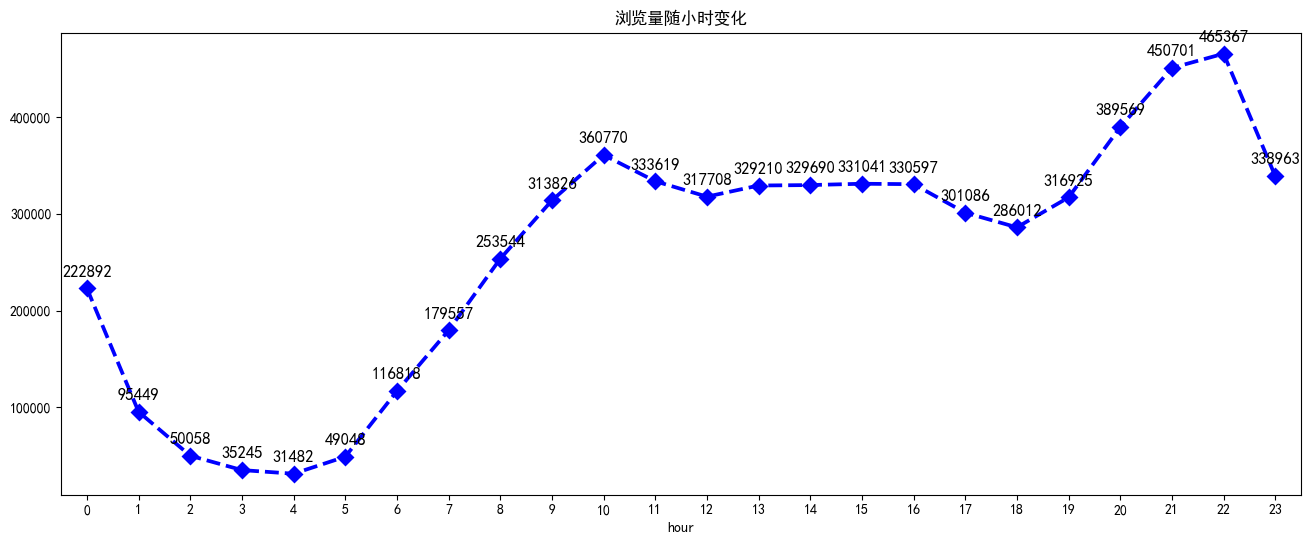

In [24]:
# 每时浏览量
pv_hourly = behavior[behavior['type'] == 'pv'].groupby('hour')['user_id'].count()

# 每时访客数
uv_hourly = behavior.groupby('hour')['user_id'].nunique()

# 可视化
fig ,ax = plt.subplots(figsize = [16,6])

sns.pointplot(x = pv_hourly.index,y = pv_hourly.values,markers = 'D',linestyles = '--',color = 'blue')

for a,b in zip(pv_hourly.index,pv_hourly.values):
    plt.text(a,b + 10000,'%i'%b,ha = 'center', va = 'bottom',fontsize = 12)
plt.title('浏览量随小时变化')



Text(0.5, 1.0, '访客数随小时变化')

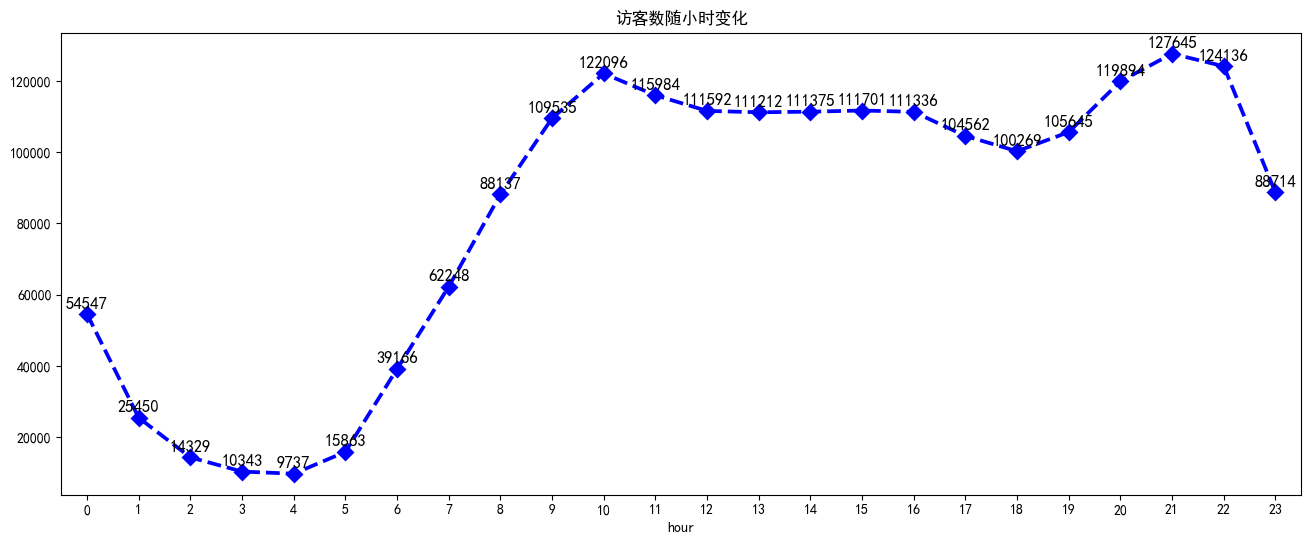

In [25]:

# 可视化
fig ,ax = plt.subplots(figsize = [16,6])

sns.pointplot(x = uv_hourly.index,y = uv_hourly.values,markers = 'D',linestyles = '--',color = 'blue')

for a,b in zip(uv_hourly.index,uv_hourly.values):
    plt.text(a,b + 1000,'%i'%b,ha = 'center', va = 'bottom',fontsize = 12)
plt.title('访客数随小时变化')


浏览量及访客数随小时变化趋势一致，在凌晨1点到凌晨5点之间，大部分用
户正在休息，整体活跃度较低。凌晨5点到10点用户开始起床工作，活跃度逐渐
增加，之后趋于平稳，下午6点之后大部分人恢复空闲，浏览量及访客数迎来了
第二波攀升，在晚上8点中到达高峰，随后逐渐下降。可以考虑在上午9点及晚
上8点增大商品推广力度，加大营销活动投入，可取的较好的收益，1点到5点之
间适合做系统维护

In [26]:
#用户各操作随小时变化
type_detail_hour = pd.pivot_table(columns = 'type',index = 'hour', data = behavior,aggfunc=np.size,values = 'user_id')
# 使用 pd.pivot_table 对 behavior 数据进行透视，以小时 ('hour' 列) 为行索引，('type' 列) 为列索引，计算每个小时每种行为类型的用户数量
 # 用户各操作随星期变化
type_detail_weekday = pd.pivot_table(columns = 'type',index = 'weekday', data = behavior,aggfunc=np.size,values = 'user_id')
# 使用 pd.pivot_table 对 behavior 数据进行透视，以星期几 ('weekday' 列) 为行索引，以用户行为类型 ('type' 列) 为列索引，计算每个星期几每种行为类型的用户数量
type_detail_weekday = type_detail_weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
# 使用 reindex 方法重新排列 type_detail_weekday 的行索引，按照星期一到星期日的顺序排列
"""type_detail_hour 
使用 pd.pivot_table 对 behavior 数据进行透视。
按小时 (hour 列) 作为行索引，按用户行为类型 (type 列) 作为列索引。
aggfunc=np.size 表示聚合函数为计算每个小时每种行为类型的用户数量。
values='user_id' 表示对 user_id 列进行计数。
type_detail_weekday 
使用 pd.pivot_table 对 behavior 数据进行透视。
按星期几 (weekday 列) 作为行索引，按用户行为类型 (type 列) 作为列索引。
aggfunc=np.size 表示聚合函数为计算每个星期几每种行为类型的用户数量。
values='user_id' 表示对 user_id 列进行计数。
type_detail_weekday 
使用 reindex 方法重新排列 type_detail_weekday 的行索引。
将行索引按照星期一到星期日的顺序重新排列，确保数据按照自然顺序呈现。
"""  



"type_detail_hour \n使用 pd.pivot_table 对 behavior 数据进行透视。\n按小时 (hour 列) 作为行索引，按用户行为类型 (type 列) 作为列索引。\naggfunc=np.size 表示聚合函数为计算每个小时每种行为类型的用户数量。\nvalues='user_id' 表示对 user_id 列进行计数。\ntype_detail_weekday \n使用 pd.pivot_table 对 behavior 数据进行透视。\n按星期几 (weekday 列) 作为行索引，按用户行为类型 (type 列) 作为列索引。\naggfunc=np.size 表示聚合函数为计算每个星期几每种行为类型的用户数量。\nvalues='user_id' 表示对 user_id 列进行计数。\ntype_detail_weekday \n使用 reindex 方法重新排列 type_detail_weekday 的行索引。\n将行索引按照星期一到星期日的顺序重新排列，确保数据按照自然顺序呈现。\n"

Text(0.5, 1.0, '用户操作随小时变化')

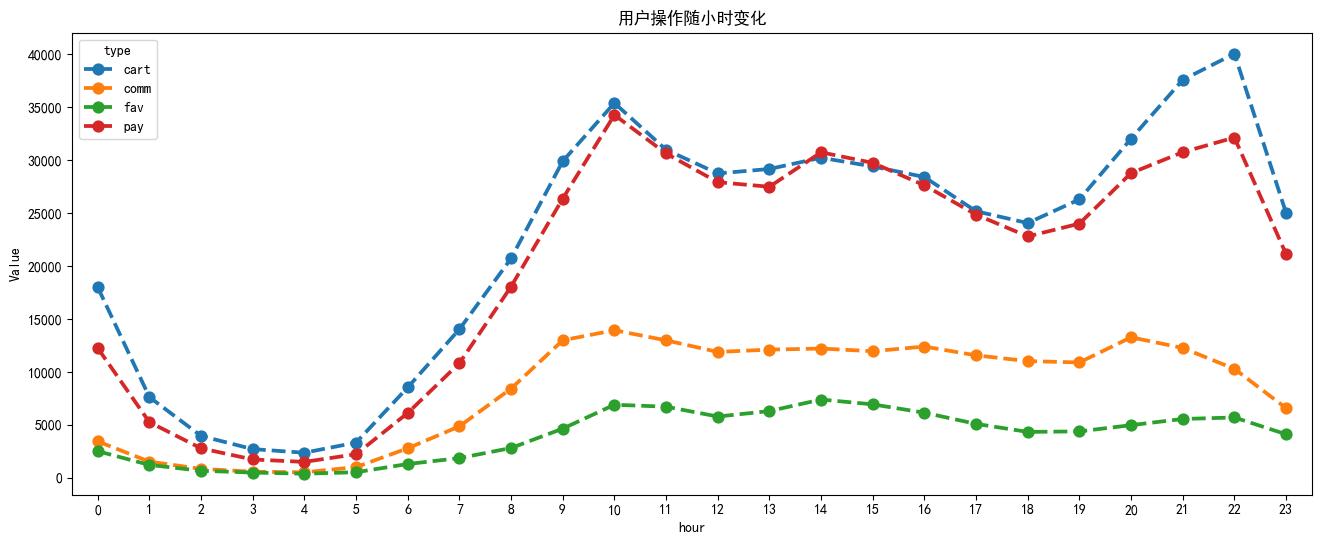

In [27]:
#将 type_detail_hour 转换为⻓格式并重命名列
tdh_line = type_detail_hour.stack().reset_index().rename(columns={0: 'Value'})
# 使用 stack() 方法将 type_detail_hour 转换为⻓格式，使得每个小时和每种行为类型的组合成为一个单独的行，并重命名数值列为 'Value' # 将 type_detail_weekday 转换为⻓格式并重命名列
tdw_line = type_detail_weekday.stack().reset_index().rename(columns={0: 'Value'})
# 使用 stack() 方法将 type_detail_weekday 转换为⻓格式，使得每个星期几和每种行为类型的组合成为一个单独的行，并重命名数值列为 'Value'
# 过滤掉 type 列为 'pv' 的行
tdh_line= tdh_line[~(tdh_line['type'] == 'pv')]# 使用 ~ 操作符过滤掉 tdh_line 中 type 列为 'pv' 的行，即排除⻚面浏览（pv）的数据
# 过滤掉 type 列为 'pv' 的行
tdw_line= tdw_line[~(tdw_line['type'] == 'pv')]# 使用 ~ 操作符过滤掉 tdw_line 中 type 列为 'pv' 的行，即排除⻚面浏览（pv）的数据

# 用户操作随小时变化可视化
# 创建图表并设置大小
fig, ax = plt.subplots(figsize=[16,6]) # 使用 sns.pointplot 绘制点线图
sns.pointplot(x='hour', y='Value', hue='type', data=tdh_line, linestyles='--')# 设置 x 轴为小时（'hour' 列），y 轴为值（'Value' 列），按用户行为类型（'type' 列）分组绘制不同颜色的线条，线型为虚线
plt.title('用户操作随小时变化')


用户操作随小时变化规律与PV、UV随小时规律相似，与用户作息规律相
关，加入购物⻋和付款两条曲线贴合比比较紧密，说明大部分用户习惯加入购
物⻋后直接购买。
关注数相对较少，可以根据用户购物⻋内商品进行精准推送。评论数也相对
较少，说明大部分用户不是很热衷对购物体验进行反馈，可以设置一些奖励制
度提高用户评论数，增大用用户粘性。



Text(0.5, 1.0, '用户操作随星期变化')

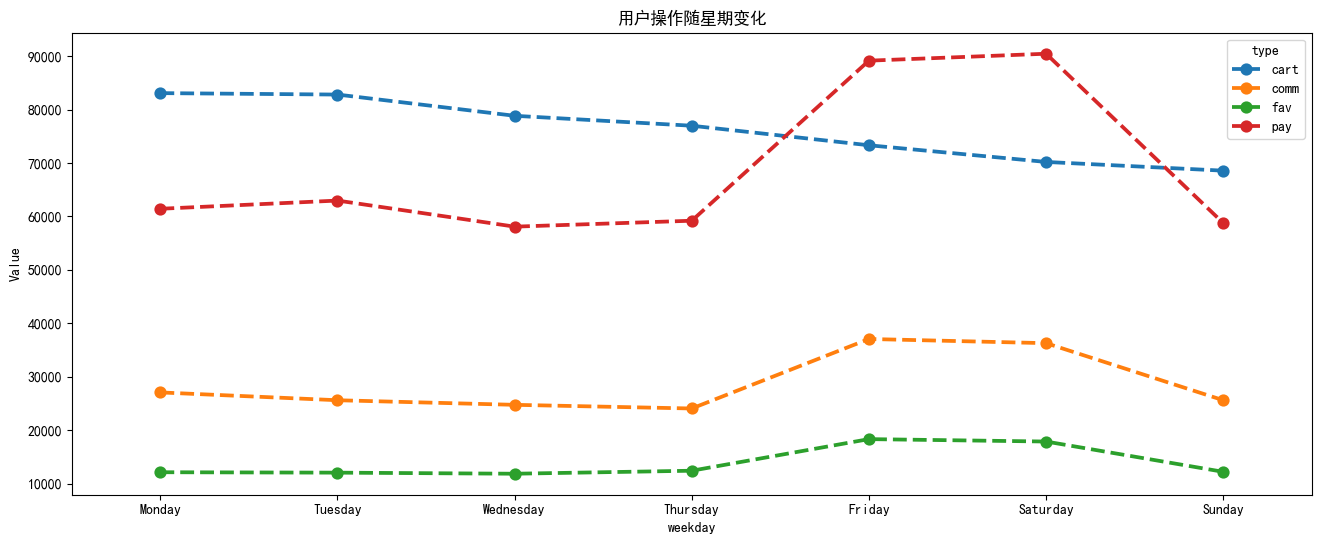

In [28]:

# 用户操作随星期变化可视化
# 创建图表并设置大小
fig, ax = plt.subplots(figsize=[16,6]) 
# 使用 sns.pointplot 绘制点线图
sns.pointplot(x='weekday', y='Value', hue='type', data=tdw_line[~(tdw_line['type'] == 'pv')], linestyles='--')
# 设置 x 轴为星期几（'weekday' 列），y 轴为值（'Value' 列），按用户行为类型（'type' 列）分组绘制不同颜色的线条，线型为虚线
plt.title('用户操作随星期变化')


周一到周四工作日期间，用户操作随星期变化比较平稳，周五至周六进入休
息日，用户操作明显增多，周日又恢复正常。



In [29]:
# 将 'action_time'列转换为datetime类型,格式为'%Y-%m-%d %H:%M:%S'
behavior['action_time'] = pd.to_datetime(behavior['action_time'],format = '%Y-%m-%d %H:%M:%S')

In [30]:
#计算行为类型分布
type_dis = behavior['type'].value_counts()
type_dis


type
pv      6229177
cart     533890
pay      480149
comm     200399
fav       96779
Name: count, dtype: int64

In [31]:
type_dis = type_dis.reset_index()
# 添加行索引将其变为DF表
type_dis

,type,count
0,pv,6229177
1,cart,533890
2,pay,480149
3,comm,200399
4,fav,96779


In [32]:
type_dis.columns = ['type','count']
type_dis

,type,count
0,pv,6229177
1,cart,533890
2,pay,480149
3,comm,200399
4,fav,96779


In [33]:
type_dis['rate'] = round(type_dis['count'] / type_dis['count'].sum(),1)

In [34]:
type_dis.style.bar(color = 'skyblue',subset = ['rate'])


,type,count,rate
0,pv,6229177,0.800000
1,cart,533890,0.100000
2,pay,480149,0.100000
3,comm,200399,0.000000
4,fav,96779,0.000000


用户整体行为中，有82.6%行为为浏览，实际支付操作仅占6.4,除此之外，
用户评论及收藏的行为占比也较低，应当增强网站有用户之间的互动，提高评论数量和收藏率

In [38]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
#在jupyter notebook 中显示html
from IPython.display import IFrame
import math

In [39]:
# 创建一个新的数据框df_con,包含'user_id','sku_id','action_time','type'这四列数据
df_con = behavior[['user_id','sku_id','action_time','type']]


In [40]:
df_pv = df_con[df_con['type'] == 'pv']
df_fav = df_con[df_con['type'] == 'fav']
df_cart = df_con[df_con['type'] == 'cart']
df_pay = df_con[df_con['type'] == 'pay']
df_pv_uid = df_con[df_con['type'] == 'pv']['user_id'].unique()
df_fav_uid = df_con[df_con['type'] == 'fav']['user_id'].unique()
df_cart_uid = df_con[df_con['type'] == 'cart']['user_id'].unique()
df_pay_uid = df_con[df_con['type'] == 'pay']['user_id'].unique()

##### 4.4.1 pv-pay

In [41]:
# 浏览和支付的合并
# 内连接
pv_pay_df = pd.merge(left = df_pv,right = df_pay,how = 'inner', on =['user_id','sku_id'],suffixes = ['_pv','_pay'])
pv_pay_df


,user_id,sku_id,action_time_pv,type_pv,action_time_pay,type_pay
0,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11 15:26:42,pay
1,669643,194478,2018-04-08 19:24:05,pv,2018-04-12 12:33:06,pay
2,1177411,211864,2018-04-09 06:11:22,pv,2018-04-09 06:14:57,pay
3,742645,33865,2018-04-02 00:14:01,pv,2018-04-02 00:22:42,pay
4,1165977,85584,2018-04-07 10:45:57,pv,2018-04-05 14:29:00,pay
...,...,...,...,...,...,...
747391,1497673,333871,2018-04-12 11:05:02,pv,2018-04-12 11:15:25,pay
747392,379252,77059,2018-04-13 17:15:33,pv,2018-04-14 14:38:16,pay
747393,290612,93842,2018-03-30 13:34:43,pv,2018-03-30 10:26:39,pay
747394,136217,353012,2018-04-02 10:22:14,pv,2018-04-02 15:55:39,pay


In [42]:
# 计算独立用户(唯一用户数)
uv = behavior['user_id'].nunique()
# 计算浏览并支付独立用户数
pv_pay_num = pv_pay_df['user_id'].nunique()

# 创建包含浏览和支付类型及对应数量的数据框
pv_pay_data = pd.DataFrame({'type':['浏览','支付'],'num':[uv,pv_pay_num]})

# 计算转换率并添加到数据框中
pv_pay_data['con_rates'] = (round(pv_pay_data['num'] / pv_pay_data['num'][0],4)* 100)
pv_pay_data


,type,num,con_rates
0,浏览,728959,100.00
1,支付,312329,42.85


In [43]:
# 浏览-支付漏斗
# 提取type列并转换成列表
attr1 = list(pv_pay_data.type)
# 提取con_rates列并转换为列表
values1 = list(pv_pay_data.con_rates)

# 将attr1 和 values1 中每个值按照索引打包为一个列表,并组成一个列表的列表

data1 = [[attr1[i],values1[i]] for i in range(len(attr1))]
data1

[['浏览', 100.0], ['支付', 42.85]]

In [ ]:
# 创建行为漏斗图,并设置为初始选项
pv_pay = (
    Funnel(opts.InitOpts(width = '600px',height = '300px'))
    .add(# 添加数据到漏斗图
        series_name = '',
        data_pair = data1,
        gap = 2,
        # trigger触发条件
            # item 当鼠标碰到图表中的数据时就会提示框显示
            # axis 鼠标碰到坐标轴时就会显示提示框显示
            # none 无论鼠标进行何种操作,提示框都会提示
        tooltip_opts = opts.TooltipOpts(trigger = 'item',formatter = "{b}:{c}%"),
        label_opts = opts.LabelOpts(is_show = True,position = 'inside'),
        # 设置样式选项
        # 漏斗的边框颜色设置为白色,边框的宽度为2
        itemstyle_opts = opts.ItemStyleOpts(border_color = '#F0F8FF',border_width = 2)

    )#设置全局选项
    .set_global_opts(title_opts = opts.TitleOpts(title = '用户行为转换漏斗图'))

)

# 注意: pyecharts出的结果图在jupyter notebook中无法渲染
pv_pay.render('用户行为漏斗1.html')

In [45]:
IFrame(src = './用户行为漏斗1.html' ,width = '600px',height = '300px')

### 2.5 用户留存率分析

In [ ]:
# 留存率
behavior.head()

,user_id,sku_id,action_time,type,date,hour,weekday
0,1455298,208441,2018-04-11 15:21:43,pv,2018-04-11,15,Wednesday
1,1455298,334318,2018-04-11 15:14:54,pv,2018-04-11,15,Wednesday
2,1455298,237755,2018-04-11 15:14:13,pv,2018-04-11,15,Wednesday
3,1455298,6422,2018-04-11 15:22:25,pv,2018-04-11,15,Wednesday
4,1455298,268566,2018-04-11 15:14:26,pv,2018-04-11,15,Wednesday


In [56]:
# 第一天
first_day = datetime.date(datetime.strptime('2018-03-30','%Y-%m-%d'))
# 第五天
fifth_day = datetime.date(datetime.strptime('2018-04-03','%Y-%m-%d'))
# 第十天
tenth_day = datetime.date(datetime.strptime('2018-04-08','%Y-%m-%d'))
# 第十五天
fifteenth_day = datetime.date(datetime.strptime('2018-04-13','%Y-%m-%d'))


# 第一天用户数
user_num_first = behavior[behavior['date'] == first_day]['user_id'].to_frame()

# 第五天的用户数
user_num_fifth = behavior[behavior['date'] == fifth_day]['user_id'].to_frame()
# 第十天的用户数
user_num_tenth = behavior[behavior['date'] == tenth_day]['user_id'].to_frame()
# 第十五天的用户数
user_num_fifteenth = behavior[behavior['date'] == fifteenth_day]['user_id'].to_frame()



In [57]:
# 计算第五天的留存率
fifth_day_ret_rate = round((pd.merge(user_num_first,user_num_fifth).nunique() / user_num_first.nunique()),4).user_id
# 计算第十天的留存率
tenth_day_ret_rate = round((pd.merge(user_num_first,user_num_tenth).nunique() / user_num_first.nunique()),4).user_id
# 计算第十五天的留存率
fifteenth_day_ret_rate = round((pd.merge(user_num_first,user_num_fifteenth).nunique() / user_num_first.nunique()),4).user_id

Text(0.5, 1.0, '用户留存率可视化')

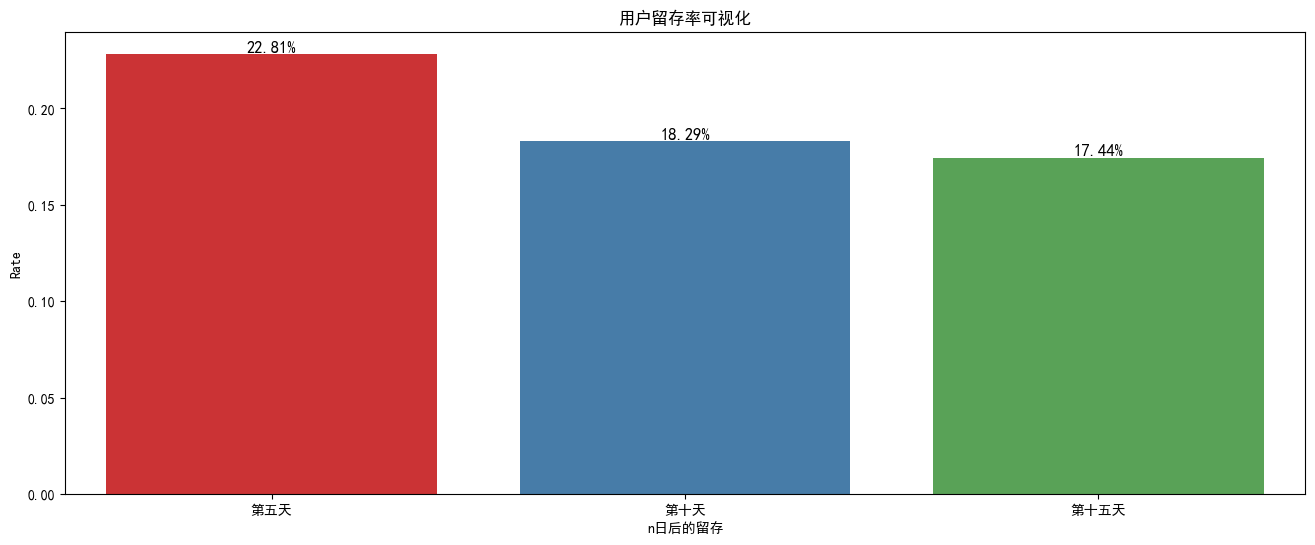

In [60]:
# 留存率可视化
data = {
    'n日后的留存':['第五天','第十天','第十五天'],
    'Rate':[fifth_day_ret_rate,tenth_day_ret_rate,fifteenth_day_ret_rate]
}
ren_rate = pd.DataFrame(data)

# 创建画布大小
fig,ax = plt.subplots(figsize = [16,6])

# 柱状图
sns.barplot(
    x = 'n日后的留存',
    y = 'Rate',
    data = ren_rate,
    palette = 'Set1',
    hue = 'n日后的留存',
    legend = False
)

# 添加注释
x = list(range(0,3))
for a,b in zip(x,ren_rate['Rate']):
    plt.text(a,b,'%.2f%%'%(b * 100), ha = 'center',va = 'bottom',fontsize = 12)
plt.title('用户留存率可视化')

## 2.6 商品销量分析

In [61]:
# 商品总数
behavior['sku_id'].nunique()


239007

In [63]:
# 商品被购前产生平均操作次数

sku_df = behavior[behavior['sku_id'].isin(behavior[behavior['type'] == 'pay']['sku_id'].unique())].groupby('sku_id')['type'].value_counts().unstack(fill_value = 0)

#添加新的列(操作的总次数)
sku_df['total'] = sku_df.sum(axis = 1)
# 平均支付
sku_df['avg_num'] = round((sku_df['pay'] / sku_df['total']),2)
sku_df

type,cart,comm,fav,pay,pv,total,avg_num
sku_id,,,,,,,
13,0,0,0,1,8,9,0.11
17,1,1,0,1,12,15,0.07
22,0,0,0,1,3,4,0.25
24,5,0,1,5,50,61,0.08
26,0,1,0,1,28,30,0.03
...,...,...,...,...,...,...,...
378413,0,0,0,1,4,5,0.20
378414,2,1,0,2,14,19,0.11
378422,1,1,0,3,19,24,0.12


Text(0.5, 1.0, '商品被购前产生平均操作次数')

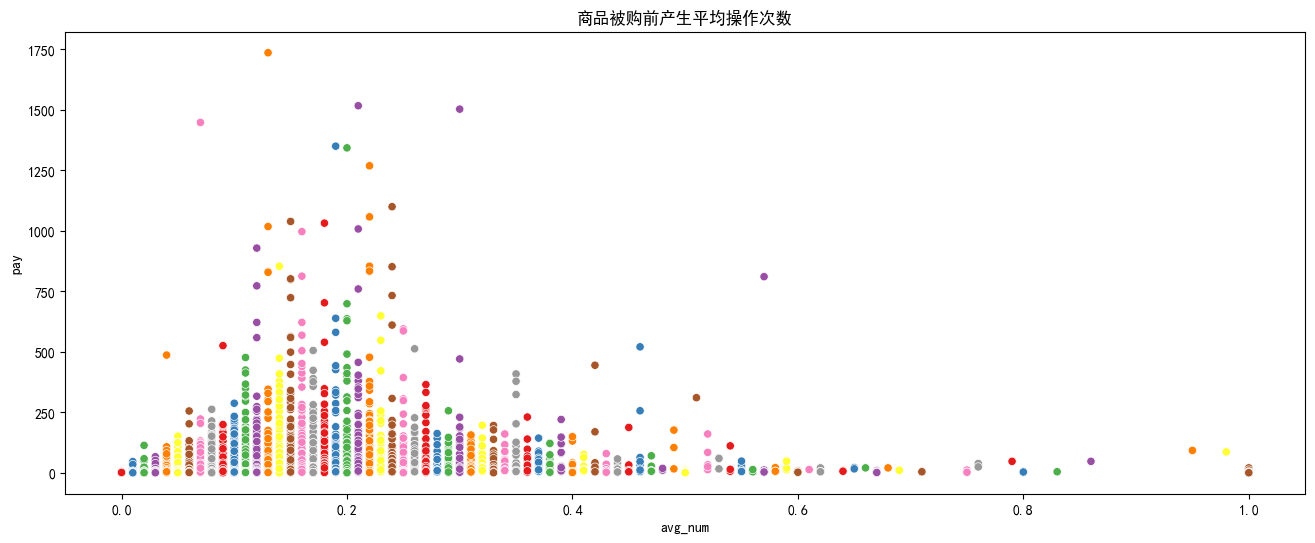

In [67]:
# 绘制商品被购前产生平均操作次数
# 散点图
fig,ax = plt.subplots(figsize = [16,6])

# 散点图
sns.scatterplot(
    x = 'avg_num',
    y = 'pay',
    data = sku_df,
    palette = 'Set1',
    hue = 'avg_num',
    legend = False
)
plt.title('商品被购前产生平均操作次数')

In [ ]:
sku_num = behavior[behavior['type'] == 'pay'].groupby('sku_id')['type'].count().to_frame().rename(columns={'type':'total'}).reset_index()
sku_num
# 筛选商品效率大于1000的商品
topsu = sku_num[sku_num['total'] > 1000].sort_values(by='total',).sort_values(by='total',ascending=False).set_index('sku_id')

# 单个用户共购买商品种数
sku_num_per_user = (behavior[behavior['type'] == 'pay']).groupby('user_id')['sku_id'].nunique()
topsu.style.bar(color=['red', 'black'],subset =['total'] )

,total
sku_id,
152092,1736
37284,1517
232801,1503
224207,1448
44024,1350
327151,1343
125519,1269
83032,1100
261934,1058


## 2.7 RFM用户分层

In [75]:
# RFM,本数据缺少M（金额），只对RF做处理，R(距离最近一次交易时间)、F(交易频率)
# behavior.head()
pay_group = behavior[behavior['type']=='pay'].groupby('user_id')['date']

In [76]:
# 将2018-04-13作为用户最后一次购买时间
final_day = datetime.date(datetime.strptime('2018-04-13','%Y-%m-%d'))
# final_day  # (2018, 4, 13)
# # 最近一次购物时间
ren_pay_time = pay_group.apply(lambda x:final_day - x.max())
ren_pay_time = ren_pay_time.reset_index().rename(columns={'date':'ren'})
ren_pay_time

,user_id,ren
0,2,-1 days
1,10,3 days
2,11,5 days
3,12,0 days
4,14,5 days
...,...,...
395869,1608695,3 days
395870,1608697,0 days
395871,1608704,13 days
395872,1608705,7 days


In [77]:
ren_pay_time['ren'] = ren_pay_time['ren'].map(lambda x:x.days)
# ren_pay_time

In [78]:
# 近十五天内购物频率
pay_freq = pay_group.count().reset_index().rename(columns={'date':'freq'})

In [79]:
# 将最近一次和近十五天内购物频率进行合并
RFM = pd.merge(ren_pay_time,pay_freq,on='user_id')
RFM['R'] = pd.qcut(RFM.ren,2,labels=['1','0'])
# qcut 将RFM数据框中的某一列分成两个等分位，并为等分位赋予标签
# 离的近的是 1 离的远的是0
RFM['F'] = pd.qcut(RFM.freq.rank(method='first'),2,labels=['0','1'])
# RFM.freq 排名rank
RFM['RFM'] = RFM['R'].astype(str) + RFM['F'].astype(str)
# RFM

# 给用户打标签
# 01  重要保持客户
# 11   重要价值客户
# 10   重要挽留客户
# 00  一般发展客户
dict_n = {
    '01':'重要保持客户',
    '11':'重要价值客户',
    '10':'重要挽留客户',
    '00':'一般发展客户'
}
RFM['用户等级'] = RFM['RFM'].map(dict_n)
RFM_pie = RFM['用户等级'].value_counts().reset_index()

Text(0.5, 1.0, 'RFM用户分层')

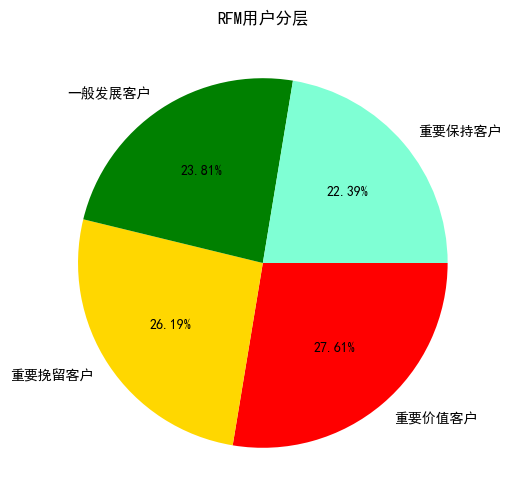

In [80]:
fig,ax = plt.subplots(figsize = [16,6])
plt.pie(
    RFM_pie['count'],
    labels = RFM_pie['用户等级'],
    colors = ['Red','Gold','Green','Aquamarine'],
    autopct = '%.2f%%',
    counterclock=False,

)
plt.title('RFM用户分层')